<a href="https://colab.research.google.com/github/alessandropessoa/ciencia-de-Dados/blob/main/classificacaiMulticlasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install skorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.3/221.3 kB 3.9 MB/s eta 0:00:00


In [2]:
from torch import nn,optim
import pandas as pd
import numpy as np
from skorch import NeuralNetBinaryClassifier
from sklearn.model_selection import cross_val_score # validação cruzada
import torch
import seaborn as sns
from torch.nn import functional as F
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


#Usaremos o dataset Iris para os testes com as redes neurais densas multiclasses.

Utilizaremos programação funcional afim de ser mais celere

In [3]:
np.random.seed(27)
torch.random.manual_seed(27)



In [4]:
dataset = pd.read_csv('/content/Iris.csv')

In [5]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
dsPreditores = dataset[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
dsPreditores


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
dsPreditores =dsPreditores.to_numpy()

In [10]:
dsAlvo = dataset['Species']
dsAlvo

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [11]:
dsAlvo = dsAlvo.to_numpy()

In [ ]:
# como o nosso objetivo é realizar a classficação entre 3 tipos de rotulos,
#'setosa', 'versicolor', 'virginica', teremos que ter 3 neuronios na saida
# as variaveis explanatorias (preditoras ou independentes) são sepal length,sepal width ,petal length
#petal width




A arquitetura da rede neural será
4 -> 4 ->4 ->3 pois 4+3/2 = 3.5 ≃ 4 neuronios

In [12]:
#Podemos observar que a camda de saida não contem uma função de ativação
#pois esta será passada na etapa de treino

classificador = nn.Sequential(
                              #camada de entrada
                              nn.Linear(4,4),\
                              nn.ReLU(),\

                              #camada oculta
                              nn.Linear(4,4),\
                              nn.ReLU(),\

                              #camada de saida
                              nn.Linear(4,3),\

)



In [13]:
#Para esse calculo de erro não utilizaremos o BCELoss (Binary Cross Entropy)
#pois a nossa classificação não é binaria e sim multiclasse

criterion = nn.CrossEntropyLoss()

In [14]:
otimizador = optim.Adam(classificador.parameters(),lr=.001, weight_decay=.0001)

<Axes: ylabel='count'>

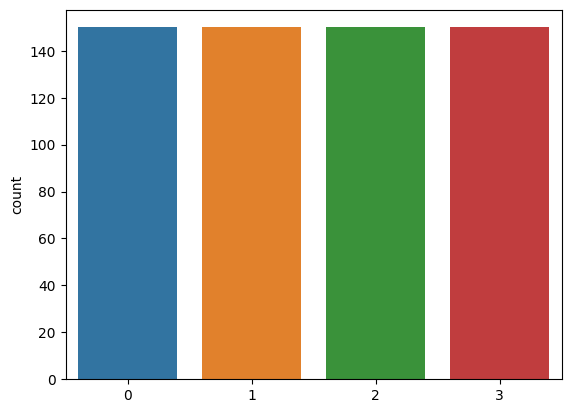

In [15]:
sns.countplot(dsPreditores) #preditores


<Axes: ylabel='count'>

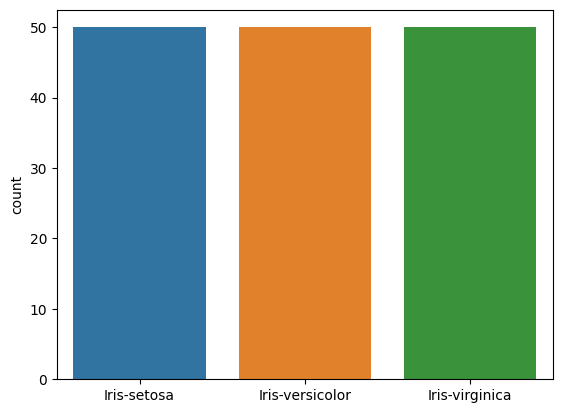

In [16]:
sns.countplot(x=dsAlvo) #variaveis alvo

In [17]:
#podemos perceber que os encoders serão 0= setosa , 1=versicolor e 2=virginica

encoder = LabelEncoder()
dsAlvo_encoder = encoder.fit_transform(dsAlvo)
dsAlvo_encoder

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
preditoresTreinamento, preditoresTeste, alvoTreinamento,alvoTeste = train_test_split(dsPreditores,dsAlvo_encoder,test_size=.25)

In [19]:
preditoresTreinamento.shape

(112, 4)

In [20]:
preditoresTeste.shape

(38, 4)

In [21]:
tensor_preditoresTreinamento = torch.tensor(preditoresTreinamento,dtype=torch.float)
tensor_preditoresTreinamento

tensor([[5.8000, 2.7000, 3.9000, 1.2000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [6.3000, 2.9000, 5.6000, 1.8000],
        [5.9000, 3.2000, 4.8000, 1.8000],
        [7.2000, 3.2000, 6.0000, 1.8000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [6.0000, 2.9000, 4.5000, 1.5000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [7.4000, 2.8000, 6.1000, 1.9000],
        [6.1000, 2.9000, 4.7000, 1.4000],
        [5.0000, 3.5000, 1.6000, 0.6000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [5.1000, 3.5000, 1.4000, 0.2000],
        [5.5000, 2.4000, 3.8000, 1.1000],
        [5.2000, 3.5000, 1.5000, 0.2000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [6.7000, 3.1000, 5.6000, 2.4000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.3000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [6.2000, 2.8000, 4.8000, 1

In [22]:
tensor_alvoTreinamento = torch.tensor(alvoTreinamento,dtype=torch.long)
tensor_alvoTreinamento

tensor([1, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 2,
        1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 2, 2, 0, 2, 0, 1,
        2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1,
        2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0,
        1, 0, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0])

In [23]:
datasetTensor = torch.utils.data.TensorDataset(tensor_preditoresTreinamento,tensor_alvoTreinamento)
train_loader = torch.utils.data.DataLoader(datasetTensor, batch_size=10, shuffle=True)

In [32]:
len(datasetTensor.tensors[0]),datasetTensor.tensors[1]

(112,
 tensor([1, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 2,
         1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 2, 2, 0, 2, 0, 1,
         2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1,
         2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0,
         1, 0, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0]))

In [38]:
for epoca in range(100):
  acumuladorErro = 0
  acuracia = 0
  for data in train_loader:
    preditores , alvo = data

    otimizador.zero_grad()

    saida = classificador.forward(preditores)
    erro  = criterion(saida, alvo)
    erro.backward()

    #como não foi definida uma camada de ativação na saida de nosso classificador multiclasse
    #usaremos a função de ativação softmax que retorna a probabilidade de pertencer a cada uma das classses

    saida =  F.softmax(saida)
    top_p , top_alvo = saida.topk(k=1, dim=1) # o parametro k com valor um retorna a classe com maior probabilidade e dim =1 quer dizer quer cada pergaremos por coluna (cada registro), pois emo colunas alvo setosa, virgina e versivolor

    comparador = top_alvo == alvo.view(*top_alvo.shape) # se o valor da classificação top_alvo for igual ao resultado da base de dados retorna True
    acuracia += torch.mean(comparador.type(torch.float))

    otimizador.step() #atualiza os pesos

    acumuladorErro += erro.item()
  print("Epoca %3d: perda %.5f - acuracia %.5f "%(epoca+1, acumuladorErro/len(train_loader), acuracia/len(train_loader)))


<ipython-input-38-512fcff48a11>:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  saida =  F.softmax(saida)


Epoca   1: perda 1.11395 - acuracia 0.33333 
Epoca   2: perda 1.11256 - acuracia 0.33333 
Epoca   3: perda 1.12431 - acuracia 0.30000 
Epoca   4: perda 1.10813 - acuracia 0.33333 
Epoca   5: perda 1.10385 - acuracia 0.33333 
Epoca   6: perda 1.09548 - acuracia 0.33333 
Epoca   7: perda 1.08823 - acuracia 0.33333 
Epoca   8: perda 1.09504 - acuracia 0.30000 
Epoca   9: perda 1.07582 - acuracia 0.33333 
Epoca  10: perda 1.04757 - acuracia 0.36667 
Epoca  11: perda 1.04102 - acuracia 0.36667 
Epoca  12: perda 1.04533 - acuracia 0.33333 
Epoca  13: perda 1.04385 - acuracia 0.33333 
Epoca  14: perda 1.02659 - acuracia 0.33333 
Epoca  15: perda 1.01448 - acuracia 0.33333 
Epoca  16: perda 1.00450 - acuracia 0.33333 
Epoca  17: perda 1.00542 - acuracia 0.30000 
Epoca  18: perda 0.97922 - acuracia 0.33333 
Epoca  19: perda 0.98260 - acuracia 0.30000 
Epoca  20: perda 0.96318 - acuracia 0.30000 
Epoca  21: perda 0.94941 - acuracia 0.30000 
Epoca  22: perda 0.93492 - acuracia 0.33333 
Epoca  23:

AVALIAÇÂO DO MODELO

In [39]:

classificador.eval()

Sequential(
  (0): Linear(in_features=4, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
)

In [40]:
tensor_preditoresTeste  =  torch.tensor(preditoresTeste,dtype=torch.float)


In [41]:
classificacoes = classificador(tensor_preditoresTeste)

In [43]:
classificacoes

tensor([[-6.1606,  0.9420,  1.8716],
        [ 0.7733, -0.1660, -0.8330],
        [-7.2782,  0.7562,  2.5163],
        [-7.5911,  1.0998,  2.4709],
        [-2.9582,  0.9332,  0.3375],
        [-3.5505,  1.1071,  0.5229],
        [-3.8718,  1.1113,  0.6717],
        [-6.5500,  0.8009,  2.1395],
        [-5.2287,  1.0840,  1.3415],
        [ 0.7733, -0.1660, -0.8330],
        [-3.5089,  1.0161,  0.5511],
        [-5.2411,  1.0123,  1.3884],
        [ 0.7733, -0.1660, -0.8330],
        [-3.7595,  0.9846,  0.6899],
        [-3.9453,  1.2211,  0.6452],
        [-3.0899,  0.9711,  0.3782],
        [ 0.7733, -0.1660, -0.8330],
        [-7.2445,  0.8646,  2.4381],
        [-6.2998,  0.7905,  2.0248],
        [-8.6457,  0.9490,  3.0657],
        [-3.6391,  1.1340,  0.5513],
        [ 0.7733, -0.1660, -0.8330],
        [-3.7973,  1.0256,  0.6847],
        [ 0.7733, -0.1660, -0.8330],
        [-6.8184,  0.8336,  2.2504],
        [-5.0560,  0.6270,  1.5186],
        [-3.2773,  1.0255,  0.4364],
 

In [44]:
# vai retornar a probabilidade de pertencer a cada classe alvo, 0='setosa', 1 ='versicolor', 2='virginica', lembrando qie o indice
#correponde a cada classe , indice 0 classe setosa., indice 1 versicolor, indice 2 virginica
classificaoes_porClasse = F.softmax(classificacoes)

<ipython-input-44-20ea878893e2>:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  classificaoes_porClasse = F.softmax(classificacoes)


In [45]:
classificaoes_porClasse

tensor([[2.3286e-04, 2.8295e-01, 7.1682e-01],
        [6.2832e-01, 2.4562e-01, 1.2606e-01],
        [4.7572e-05, 1.4677e-01, 8.5318e-01],
        [3.4030e-05, 2.0243e-01, 7.9754e-01],
        [1.2991e-02, 6.3630e-01, 3.5071e-01],
        [6.0559e-03, 6.3814e-01, 3.5581e-01],
        [4.1505e-03, 6.0562e-01, 3.9023e-01],
        [1.3336e-04, 2.0771e-01, 7.9216e-01],
        [7.8986e-04, 4.3565e-01, 5.6356e-01],
        [6.2832e-01, 2.4562e-01, 1.2606e-01],
        [6.6108e-03, 6.1013e-01, 3.8326e-01],
        [7.8257e-04, 4.0676e-01, 5.9246e-01],
        [6.2832e-01, 2.4562e-01, 1.2606e-01],
        [4.9631e-03, 5.7030e-01, 4.2474e-01],
        [3.6385e-03, 6.3779e-01, 3.5857e-01],
        [1.0976e-02, 6.3695e-01, 3.5207e-01],
        [6.2832e-01, 2.4562e-01, 1.2606e-01],
        [5.1647e-05, 1.7172e-01, 8.2823e-01],
        [1.8778e-04, 2.2539e-01, 7.7442e-01],
        [7.3184e-06, 1.0749e-01, 8.9251e-01],
        [5.3958e-03, 6.3824e-01, 3.5637e-01],
        [6.2832e-01, 2.4562e-01, 1

In [46]:
classificavoes_np = [np.argmax(t) for t in classificaoes_porClasse.detach().numpy()]

In [47]:
classificavoes_np

[2,
 0,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 0,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 2]

In [48]:
len(classificavoes_np)

38

In [52]:
matrizConfusao = confusion_matrix(classificavoes_np, alvoTeste)

In [53]:
matrizConfusao

array([[ 9,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 15]])

<Axes: >

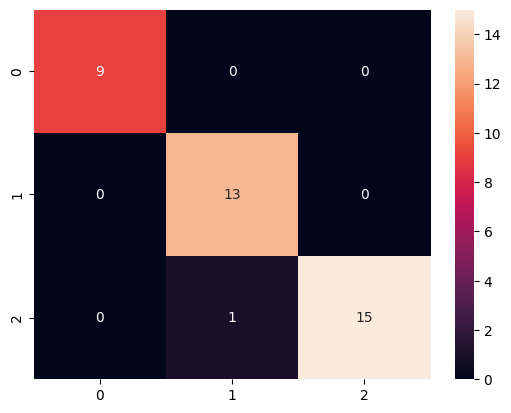

In [54]:
sns.heatmap(matrizConfusao,annot=True)